### Request 사용법
##### ->  서버 데이터를 받아옴

In [5]:
import requests as req

In [8]:
res = req.get("https://www.naver.com/")

In [13]:
# Response [200] ->  데이터가 잘 넘어왔음
res

<Response [200]>

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
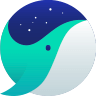
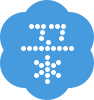

In [11]:
res.text

### Melon 홈페이지의 정보 가져오기

In [14]:
melon=req.get("https://www.melon.com/")

In [75]:
# Response [406] -> 사이트에서 컴퓨터의 접근을 제한함
melon

<Response [406]>

In [21]:
# 406이 떠서 불러올 수  없음.
melon.text

''

In [22]:
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}

In [33]:
res = req.get("https://www.melon.com/", headers = h)
#headers -> 서버에게 컴퓨터가 아니고 사람으로 속이는 작업

In [34]:
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 실시간 차트부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="f13fc46b807bef984aa341efeb1adec8de12264c"/>\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론"/>\r\n\t<meta property="og:url" content="http://www.melon.com/"/>\r\n\t<meta pro

### BeautifulSoup 라이브러리 사용
#서버에게 넘겨받은 페이지 정보에서 내가 원하는 내용만 추출하게 해주는 라이브러리

In [52]:
# bs4 라는 곳에서 BeautifulSoup를 꺼내옴
from bs4 import BeautifulSoup as bs

In [37]:
naver = req.get("https://www.naver.com/")
naver

<Response [200]>

In [39]:
info = naver.text

In [76]:
# bs >> 필요한 데이터만 추출 (어떤 데이터 인지, 어떻게 가지고 올 건지)
# bs에 lxml 방식으로 데이터를 추출함(위의 과정을 데이터 가공이라고 칭함)
naver_info = bs(info,'lxml')

In [49]:
naver_txt = naver_info.find_all('a',class_ = 'nav')

In [54]:
# 리스트 형식이기 때문에 인덱스로 가져와야함
naver_txt[2].text

'블로그'

In [60]:
# 모든 데이터를 받아오고 싶다면, for문을 이용해서 가져올 수 있음
#index뒤에 text를 붙여줘야 텍스트 형식으로 가져올 수 있음
for index in naver_txt :
    print(index.text)

메일
카페
블로그
지식iN
쇼핑
Pay
TV
사전
뉴스
증권
부동산
지도
영화
VIBE
책
웹툰


### 네이버 뉴스 타이틀만 가져오기

In [62]:
co = req.get("https://search.naver.com/search.naver?&where=news&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_tmr&frm=mr&nso=so:r,p:all,a:all&sort=0")

In [64]:
co_1 = co.text

In [66]:
co_info = bs(co_1,'lxml')

In [72]:
co_text = co_info.find_all('a',class_ = 'news_tit')

In [73]:
co_text[1].text

'내년 초 국내 최초 코로나19 백신 시판허가 나오나'

In [74]:
for index in co_text :
    print(index.text)

민주노총 오늘 총파업 돌입…곳곳 집회에 코로나19 확산 우려
내년 초 국내 최초 코로나19 백신 시판허가 나오나
코로나 확진 382명, 수도권 255명… "불감증이 최대 난적"(종합)
[단독] '허쉬' 황정민 코로나19 검사 결과 '음성'
[단독] '철인왕후' 신혜선, 코로나19 음성 판정
배우 박은석 "코로나19 음성, 경각심 갖겠다" [전문]
셀트리온, 코로나19 항체치료제 식약처 조건부 허가 신청 계획
셀트리온, 코로나19 치료제 임상 2상 투약 끝냈다
[단독] '조선구마사' 감우성, 코로나19 음성 판정
美, 한국 여행경보 2단계로 내려..."코로나19 상황 개선"
